# Introduccion a Pandas

Pandas es una herramienta de analisis de datos tabulares 

In [1]:
import pandas as pd
pd.__version__

'1.3.5'

In [17]:
data_teams = {'year': 
        [2010 , 2011 , 2012 ,
        2010 , 2011 , 2012 ,
        2010 , 2011 , 2012],
        'team': [
        'Rangers','Rangers',
        'Rangers','Colo Colo',
        'Colo Colo','Colo Colo',
        'Universidad de Chile','Universidad de Chile',
        'Universidad de Chile'],
        'wins':[30 , 28 , 32 , 29 , 32 , 26 , 21 , 17 , 19] ,
        'draws':[6 , 7 , 4 , 5 , 4 , 7 , 8 , 10 , 8] ,
        'losses': [2 , 3 , 2 , 4 , 2 , 5 , 9 , 11 , 11]
        }

df = pd.DataFrame(data_teams ,columns=data_teams.keys())

In [18]:
df.head()

,year,team,wins,draws,losses
0,2010,Rangers,30,6,2
1,2011,Rangers,28,7,3
2,2012,Rangers,32,4,2
3,2010,Colo Colo,29,5,4
4,2011,Colo Colo,32,4,2


In [19]:
df.dtypes

year       int64
team      object
wins       int64
draws      int64
losses     int64
dtype: object

In [20]:
df['team'] = df['team'].astype('category')
df['year']=pd.to_datetime(df['year'], format='%Y')

In [21]:
df['team'].unique()

['Rangers', 'Colo Colo', 'Universidad de Chile']
Categories (3, object): ['Colo Colo', 'Rangers', 'Universidad de Chile']

In [24]:
type(df['team']=='Rangers')

pandas.core.series.Series

In [22]:
df_talca=df[df['team']=='Rangers']

In [26]:
df_talca

,year,team,wins,draws,losses
0,2010-01-01,Rangers,30,6,2
1,2011-01-01,Rangers,28,7,3
2,2012-01-01,Rangers,32,4,2


In [27]:
df.dtypes

year      datetime64[ns]
team            category
wins               int64
draws              int64
losses             int64
dtype: object

La tabla ``df`` se encuentra indexada mediante un objeto del tipo ``pd.Index`` que nos sirve para acceder a los registros individuales.

In [29]:
print(df.index)

RangeIndex(start=0, stop=9, step=1)


In [30]:
df[df.index==0]

,year,team,wins,draws,losses
0,2010-01-01,Rangers,30,6,2


In [31]:
df.iloc[0]

year      2010-01-01 00:00:00
team                  Rangers
wins                       30
draws                       6
losses                      2
Name: 0, dtype: object

In [32]:
df[0:2]

,year,team,wins,draws,losses
0,2010-01-01,Rangers,30,6,2
1,2011-01-01,Rangers,28,7,3


In [40]:
sum_data=df.groupby(['year','team']).mean()

In [41]:
print(sum_data)

                                 wins  draws  losses
year       team                                     
2010-01-01 Colo Colo             29.0    5.0     4.0
           Rangers               30.0    6.0     2.0
           Universidad de Chile  21.0    8.0     9.0
2011-01-01 Colo Colo             32.0    4.0     2.0
           Rangers               28.0    7.0     3.0
           Universidad de Chile  17.0   10.0    11.0
2012-01-01 Colo Colo             26.0    7.0     5.0
           Rangers               32.0    4.0     2.0
           Universidad de Chile  19.0    8.0    11.0


In [37]:
sum_data.index

DatetimeIndex(['2010-01-01', '2011-01-01', '2012-01-01'], dtype='datetime64[ns]', name='year', freq=None)

# Multiplicacion de Enteros

In [1]:
import time
import numpy as np

def naive_sum_multiply(a, b):
    val=0
    for i in range(a):
        val+=b
    return val


def naive_multiply(a, b):
    if len(str(a)) == 1 or len(str(b)) == 1:
        return a * b
    else:
        x=str(a)
        y=str(b)
        m1=len(x) 
        m2=len(y)
        val=0
        for i in range(m1):
            for j in range(m2):
                prod=int(x[i])*int(y[j])
                power=pow(10,(m1-i-1)+(m2-j-1))
                val+=prod*power
        return val

def karatsuba(a, b):
    if len(str(a)) == 1 or len(str(b)) == 1:
        return a * b
    else:
        m1 = max(len(str(a)), len(str(b)))
        m2 = m1 // 2

        a1, a2 = divmod(a, 10**m2)
        b1, b2 = divmod(b, 10**m2)

        x = karatsuba(a2, b2)
        y = karatsuba((a1 + a2), (b1 + b2))
        z = karatsuba(a1, b1)

        return (z * 10 ** (2 * m2)) + ((y - z - x) * 10 ** (m2)) + (x)

In [2]:
a=np.random.randint(1e12)
b=np.random.randint(1e12)
t1=time.time()
z=karatsuba(a,b)
ellapsed_time=time.time()-t1
print('a : {}, b : {}, a*b : {}, time : {} '.format(a,b,z,ellapsed_time))


a : 499741646687, b : 410824026641, a*b : 205305875572157297388367, time : 0.0002460479736328125 


In [3]:
a=np.random.randint(1e12)
b=np.random.randint(1e12)
t1=time.time()
z=naive_multiply(a,b)
ellapsed_time=time.time()-t1
print('a : {}, b : {}, a*b : {}, time : {} '.format(a,b,z,ellapsed_time))

a : 892090281867, b : 927362336136, a*b : 827290927836403839645912, time : 0.00025200843811035156 


In [4]:
time_data={'method':list(),'ellapsed_time':list(),'problem_size':list()}

In [88]:
len(str(np.random.randint(low=1e18,dtype=np.uint64)))

18

In [77]:
len(str(18446744073709551615))

20

In [81]:
u=np.uint64(18446744073709551615)

In [90]:
u.bit_count()

64

In [63]:
help(np.uint64)

Help on class uint64 in module numpy:

class uint64(unsignedinteger)
 |  Unsigned integer type, compatible with C ``unsigned long``.
 |  
 |  :Character code: ``'L'``
 |  :Canonical name: `numpy.uint`
 |  :Alias on this platform (Darwin arm64): `numpy.uint64`: 64-bit unsigned integer (``0`` to ``18_446_744_073_709_551_615``).
 |  :Alias on this platform (Darwin arm64): `numpy.uintp`: Unsigned integer large enough to fit pointer, compatible with C ``uintptr_t``.
 |  
 |  Method resolution order:
 |      uint64
 |      unsignedinteger
 |      integer
 |      number
 |      generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      True if self else False
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  

In [45]:
methods=['karatsuba','naive_multiply']
problems=[1e6,1e12,1e18]
sample_size=100

In [46]:
import sys

sys.setrecursionlimit(3000)

In [53]:
for m in methods:
  for p in problems:
    for i in range(sample_size):
      a=np.random.randint(p)
      b=np.random.randint(p)
      t1=time.time()
      eval(m)(a,b)
      ellapsed_time=time.time()-t1
      time_data['problem_size'].append(p)
      time_data['method'].append(m)
      time_data['ellapsed_time'].append(ellapsed_time)

In [54]:
time_data.keys()

dict_keys(['method', 'ellapsed_time', 'problem_size'])

In [55]:
import pandas as pd

df=pd.DataFrame(time_data)

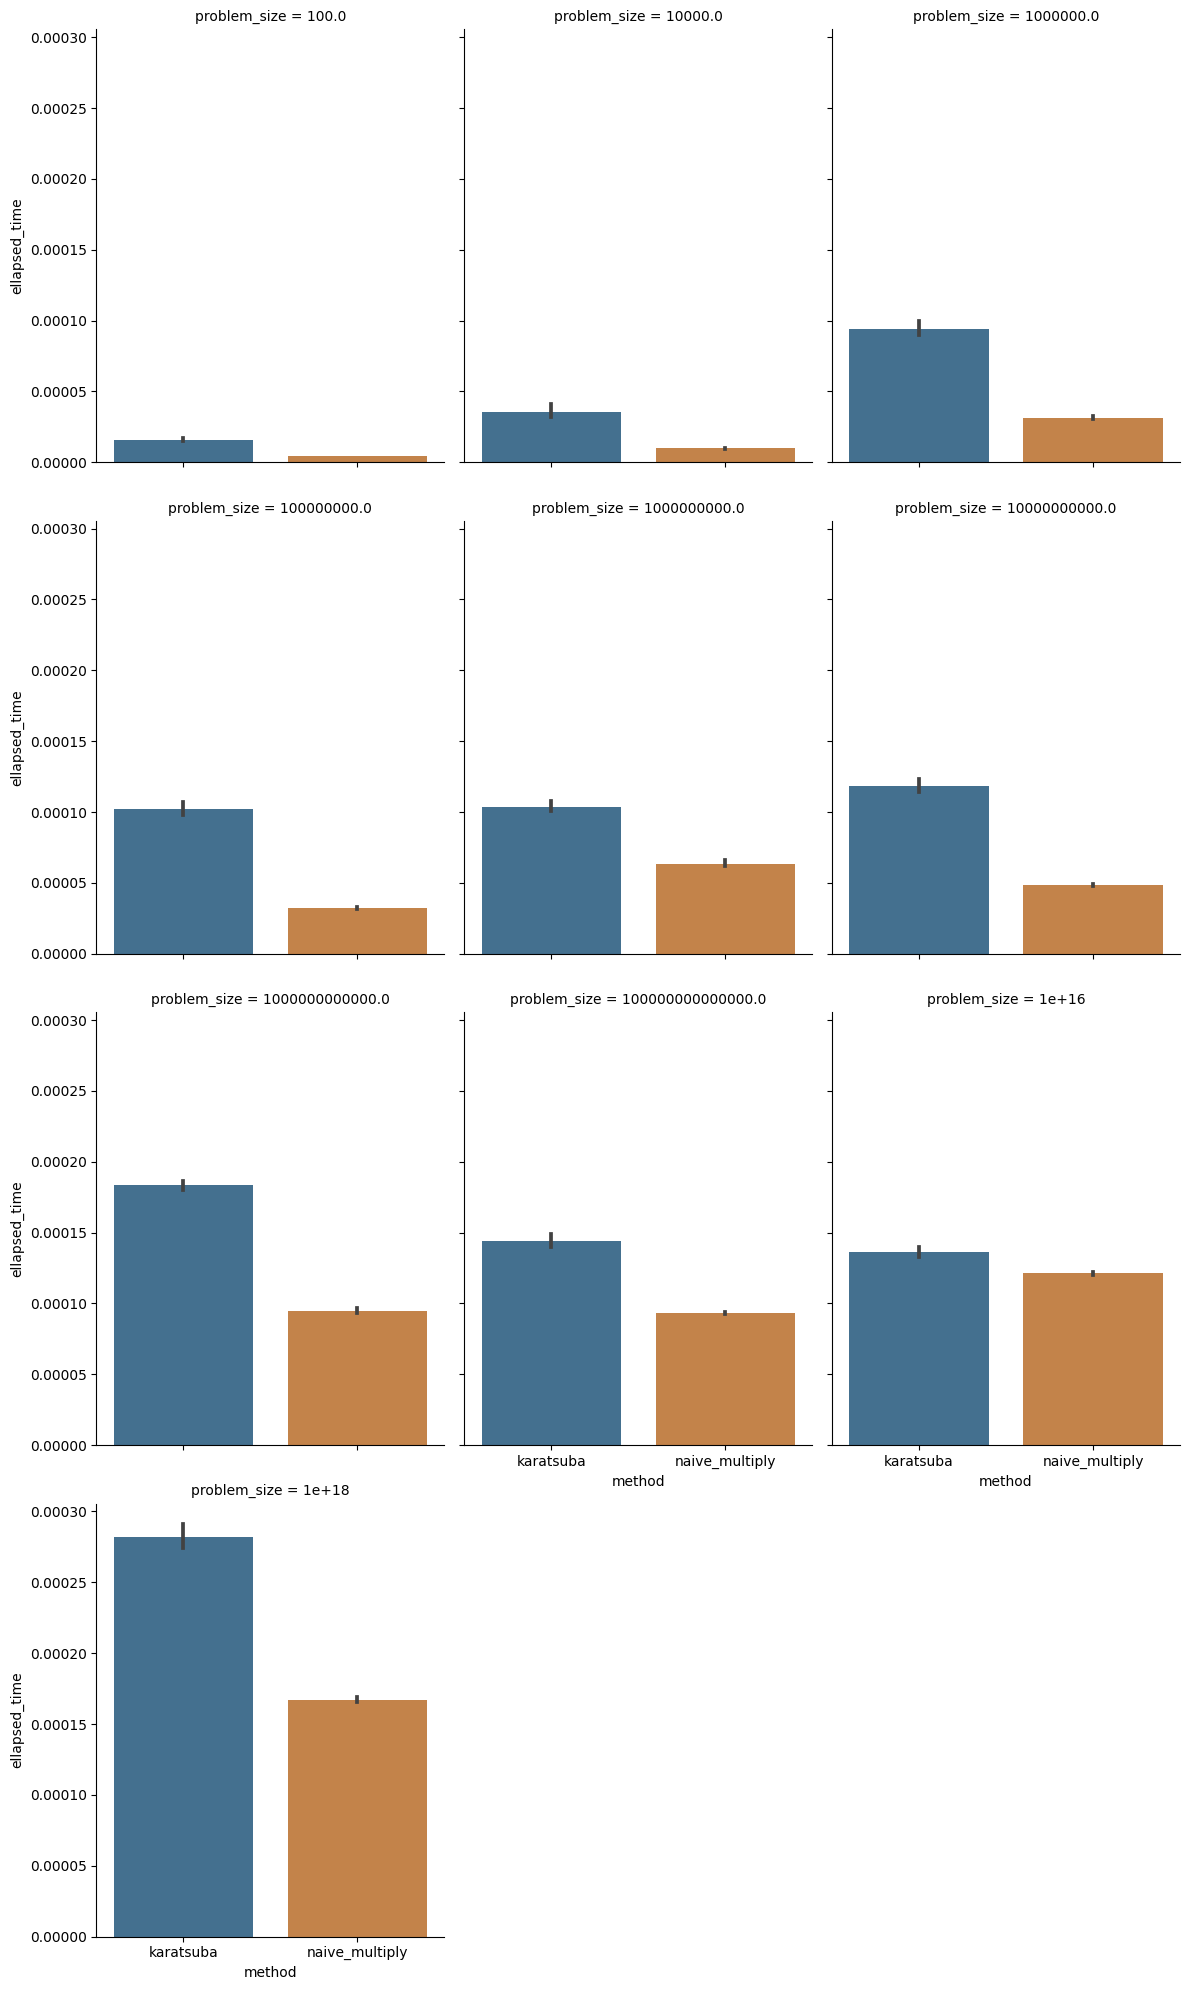

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.catplot(x="method", y="ellapsed_time", col="problem_size",data=df, saturation=.5,
                kind="bar", col_wrap=3, height=5, aspect=.8)

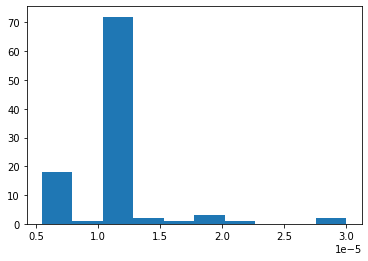

In [60]:
plt.hist(results)
plt.show()

In [12]:
df['problem_size']=df['problem_size'].astype(int)

In [17]:
df.groupby(['method','problem_size']).mean()

ellapsed_time
method         problem_size                      
karatsuba      100                       0.000015
               10000                     0.000036
               100000000                 0.000102
               10000000000               0.000119
               1000000000000             0.000139
               100000000000000           0.000144
               10000000000000000         0.000136
               1000000000000000000       0.000145
naive_multiply 100                       0.000004
               10000                     0.000010
               100000000                 0.000032
               10000000000               0.000048
               1000000000000             0.000068
               100000000000000           0.000093
               10000000000000000         0.000121
               1000000000000000000       0.000155

<AxesSubplot: xlabel='problem_size', ylabel='ellapsed_time'>

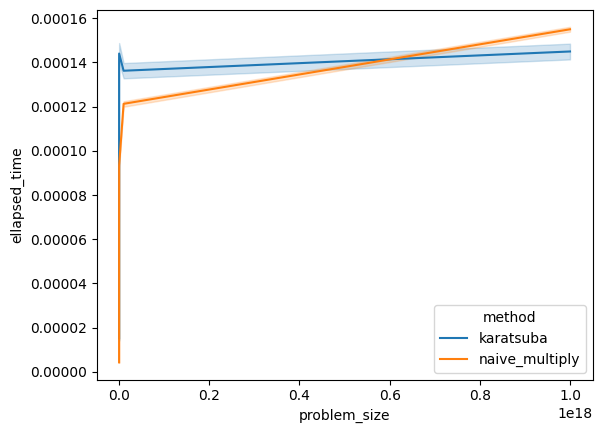

In [19]:
import seaborn as sns

sns.lineplot(data=df, x='problem_size', y='ellapsed_time',hue='method')